In [1]:
# Bibliotecas base
import pandas as pd

# Tratamento de dados
from sklearn.model_selection import train_test_split

# Selecao de Hiper Parametros
from sklearn.model_selection import GridSearchCV

# Modelos para treinamento
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Avaliacao de modelos
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Carregar o dataset

In [2]:
# Dados da tabela
data = [
    ('Dia', 'Aparência', 'Temperatura', 'Umidade', 'Ventando', 'Jogar'),
    ('d1', 'sol', 'quente', 'alta', 'nao', 'nao'),
    ('d2', 'sol', 'quente', 'alta', 'sim', 'nao'),
    ('d3', 'nublado', 'quente', 'alta', 'nao', 'sim'),
    ('d4', 'chuva', 'agradavel', 'alta', 'nao', 'sim'),
    ('d5', 'chuva', 'fria', 'normal', 'nao', 'sim'),
    ('d6', 'chuva', 'fria', 'normal', 'sim', 'nao'),
    ('d7', 'nublado', 'fria', 'normal', 'sim', 'sim'),
    ('d8', 'sol', 'agradavel', 'alta', 'nao', 'nao'),
    ('d9', 'sol', 'fria', 'normal', 'nao', 'sim'),
    ('d10', 'chuva', 'agradavel', 'normal', 'nao', 'sim'),
    ('d11', 'sol', 'agradavel', 'normal', 'sim', 'sim'),
    ('d12', 'nublado', 'agradavel', 'alta', 'sim', 'sim'),
    ('d13', 'nublado', 'quente', 'normal', 'nao', 'sim'),
    ('d14', 'chuva', 'agradavel', 'alta', 'sim', 'nao')
]

# Criando o DataFrame
df = pd.DataFrame(data[1:], columns=data[0])
df.head()

,Dia,Aparência,Temperatura,Umidade,Ventando,Jogar
0,d1,sol,quente,alta,nao,nao
1,d2,sol,quente,alta,sim,nao
2,d3,nublado,quente,alta,nao,sim
3,d4,chuva,agradavel,alta,nao,sim
4,d5,chuva,fria,normal,nao,sim


# Tratamento dos dados

In [3]:
# Mapeando os valores categóricos para numéricos
mappings = {
    'Aparência': {'sol': 0, 'nublado': 1, 'chuva': 2},
    'Temperatura': {'fria': 0, 'agradavel': 1, 'quente': 2},
    'Umidade': {'normal': 0, 'alta': 1},
    'Ventando': {'nao': 0, 'sim': 1},
    'Jogar': {'nao': 0, 'sim': 1}
}

# Aplicando a conversão
df = df.replace(mappings)

# Removendo a coluna 'Dia' pois ela não será usada no treinamento
df = df.drop(columns=['Dia'])
df.head()

,Aparência,Temperatura,Umidade,Ventando,Jogar
0,0,2,1,0,0
1,0,2,1,1,0
2,1,2,1,0,1
3,2,1,1,0,1
4,2,0,0,0,1


# Dividir os dados em treino e teste

In [4]:
# Separando os dados em features e target
x = df.drop(columns=['Jogar'])
y = df['Jogar']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=4, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10, 4), (4, 4), (10,), (4,))

# Naive Bayes

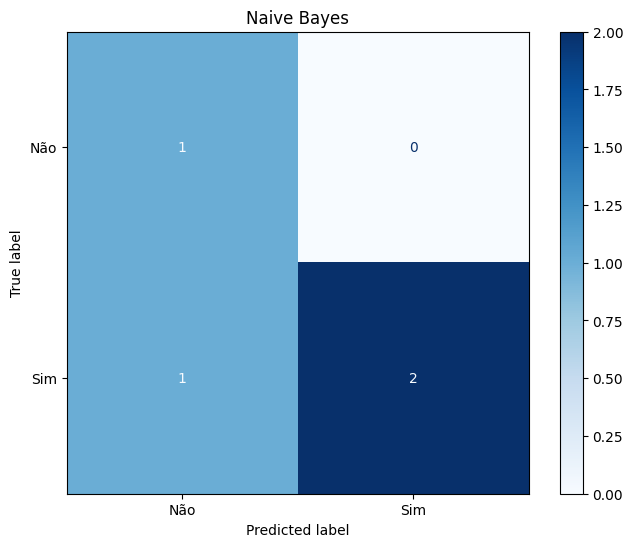

,precision,recall,f1-score,support
Não,0.50,1.00,0.67,1.00
Sim,1.00,0.67,0.80,3.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.75,0.83,0.73,4.00
weighted avg,0.88,0.75,0.77,4.00


In [5]:
# Inicializando o modelo
nb = CategoricalNB()

# Hiperparâmetros para o GridSearch
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False]
}

# GridSearch
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=4)
grid_search_nb.fit(x_train, y_train)

# Treinando o modelo com os melhores parâmetros
best_nb = CategoricalNB(alpha=grid_search_nb.best_params_['alpha'], fit_prior=grid_search_nb.best_params_['fit_prior'])
best_nb.fit(x_train, y_train)

# Predição e métricas
y_pred_nb = best_nb.predict(x_test)
confusion_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True, target_names=['Não', 'Sim'])
report_nb_df = pd.DataFrame(report_nb).transpose()

# Plotagem dos valores
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_nb, display_labels=['Não', 'Sim'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Naive Bayes')
plt.show()

report_nb_df.round(2)


# Random Forest

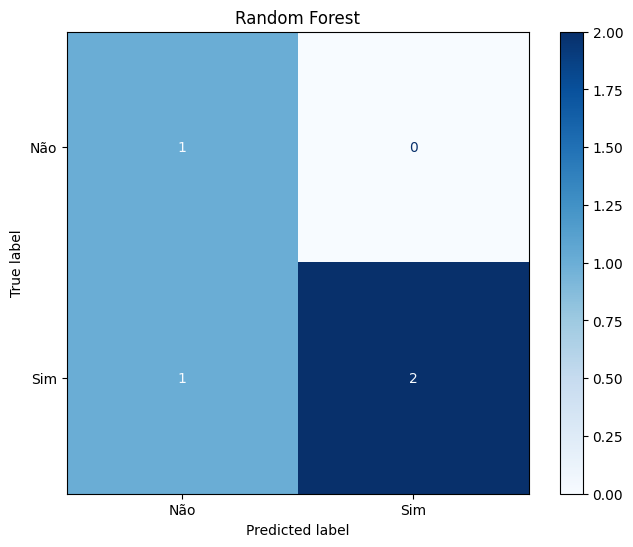

,precision,recall,f1-score,support
Não,0.50,1.00,0.67,1.00
Sim,1.00,0.67,0.80,3.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.75,0.83,0.73,4.00
weighted avg,0.88,0.75,0.77,4.00


In [6]:
# Inicializando o modelo
rf = RandomForestClassifier()

# Reduzindo o espaço de busca de hiperparâmetros
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearch
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=4)
grid_search_rf.fit(x_train, y_train)

# Treinando o modelo com os melhores parâmetros
best_rf = RandomForestClassifier(
    n_estimators=grid_search_rf.best_params_['n_estimators'],
    max_depth=grid_search_rf.best_params_['max_depth'],
    min_samples_split=grid_search_rf.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_rf.best_params_['min_samples_leaf']
)
best_rf.fit(x_train, y_train)

# Predição e métricas
y_pred_rf = best_rf.predict(x_test)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True, target_names=['Não', 'Sim'])
report_rf_df = pd.DataFrame(report_rf).transpose()

# Plotagem dos valores
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_rf, display_labels=['Não', 'Sim'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Random Forest')
plt.show()

report_rf_df.round(2)

# Decision Tree

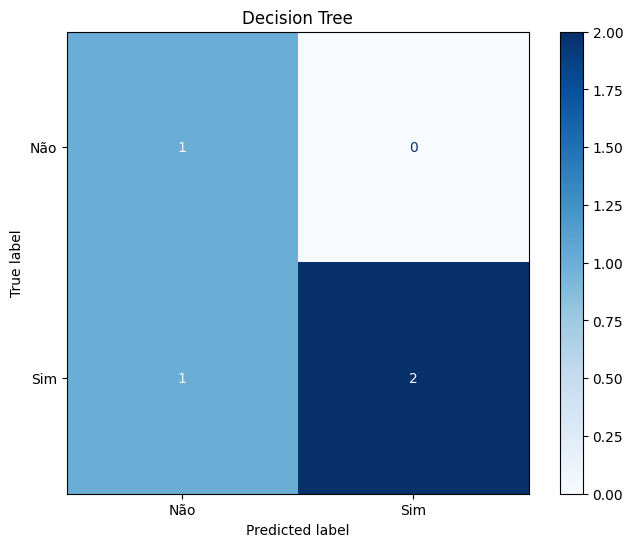

,precision,recall,f1-score,support
Não,0.50,1.00,0.67,1.00
Sim,1.00,0.67,0.80,3.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.75,0.83,0.73,4.00
weighted avg,0.88,0.75,0.77,4.00


In [7]:
# Inicializando o modelo
dt = DecisionTreeClassifier()

# Hiperparâmetros para o GridSearch e RandomizedSearch
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=4)
grid_search_dt.fit(x_train, y_train)

# Treinando o modelo com os melhores parâmetros
best_dt = DecisionTreeClassifier(
    criterion=grid_search_dt.best_params_['criterion'],
    splitter=grid_search_dt.best_params_['splitter'],
    max_depth=grid_search_dt.best_params_['max_depth'],
    min_samples_split=grid_search_dt.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_dt.best_params_['min_samples_leaf']
)
best_dt.fit(x_train, y_train)

# Predição e métricas
y_pred_dt = best_dt.predict(x_test)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True, target_names=['Não', 'Sim'])
report_dt_df = pd.DataFrame(report_dt).transpose()

# Plotagem dos valores
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_dt, display_labels=['Não', 'Sim'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Decision Tree')
plt.show()

report_dt_df.round(2)